In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url
import wrangle_zillow as w
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# creating df variable

In [3]:
df = w.get_zillow_data()

In [4]:
columns = ['buildingqualitytypeid','heatingorsystemdesc','heatingorsystemtypeid','unitcnt','propertyzoningdesc','propertylandusedesc','parcelid.1','id.1','censustractandblock']

In [5]:
#using handle missing values function
df = w.data_prep(df,columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  float64
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [7]:
df = w.prepare_zillow(df)

/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.orange_county[df.location == 1] = 1
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ventura[df.location == 2] = 1
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  object 
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [9]:
train, validate, test = w.wrangle_zillow(df)

In [10]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,max_transactiondate,logerror,transactiondate,location,orange_county,ventura,losangeles
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,2016.0,266297.0,4357.93,2017-03-24,0.026998,2017-03-24,0,0,0,1
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,2016.0,142053.0,3515.14,2017-06-09,0.037181,2017-06-09,1,1,0,0
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,2016.0,50642.0,1893.90,2017-03-24,0.019205,2017-03-24,0,0,0,1
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,2016.0,2288518.0,47785.18,2017-02-22,0.037875,2017-02-22,0,0,0,1
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,2016.0,540465.0,14379.50,2017-06-27,0.002652,2017-06-27,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,2016.0,548239.0,7041.04,2017-07-12,-0.006377,2017-07-12,1,1,0,0
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,2016.0,414596.0,9365.87,2017-08-30,-0.008494,2017-08-30,0,0,0,1
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,2016.0,276422.0,4630.60,2017-04-25,0.680864,2017-04-25,0,0,0,1
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,2016.0,271335.0,4590.46,2017-05-03,0.038707,2017-05-03,1,1,0,0


In [11]:
trainExplore = train
trainExplore['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])
trainExplore['latitude_bin'] = pd.cut(train.latitude, [0,33600000,34200000,34600000,35000000])
trainExplore['longitude_bin'] = pd.cut(train.longitude, [-119200000,-119000000,-118600000,-117800000,0])
trainExplore['squarefeet_bin'] = pd.cut(train.sqft,[0,3000,8000,12000])
trainExplore['age_bin'] = pd.cut(train.age, [0,30,60,90,120])
trainExplore['lowerrors'] = pd.cut(train.logerror, [-.25,0,.25,.5])
train = train[train.lotsizesquarefeet < 100000]

In [12]:
x_train = ['sqft','age','latitude','longitude','lotsizesquarefeet','beds','baths']


In [13]:
imp_df = train[x_train]

In [14]:
scaled_x_train = w.scale_zillow(imp_df,x_train)

/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdf[impfeats] = Scaler.fit_transform(impdf[impfeats])


In [15]:
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.060570,0.496183,0.433728,0.721678,0.049851,0.181818,0.0
30453,0.177337,0.305344,0.194141,0.940035,0.068203,0.272727,0.2
13337,0.078994,0.419847,0.535385,0.862331,0.073113,0.272727,0.1
7660,0.389585,0.022901,0.494856,0.521215,0.105400,0.454545,0.5
34175,0.359468,0.129771,0.457679,0.853861,0.102233,0.454545,0.4
...,...,...,...,...,...,...,...
38066,0.122739,0.419847,0.310793,0.858216,0.080504,0.272727,0.1
48425,0.210314,0.389313,0.333578,0.730793,0.054086,0.454545,0.2
19647,0.152267,0.496183,0.380818,0.555180,0.015468,0.272727,0.1
21717,0.131404,0.343511,0.194523,0.847327,0.060449,0.272727,0.1


In [16]:
location = ['latitude','longitude','age']
location_x_train = scaled_x_train[location]
structure = ['beds','baths']
structure_x_train = scaled_x_train[structure]
Foundation = ['sqft','lotsizesquarefeet']
foundation_x_train = scaled_x_train[Foundation]


In [17]:
location_x_train['agebin'] =  pd.cut(location_x_train.age, [0,30,60,90,120])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/2373447999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['agebin'] =  pd.cut(location_x_train.age, [0,30,60,90,120])


In [18]:
imp_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.060570,0.496183,0.433728,0.721678,0.049851,0.181818,0.0
30453,0.177337,0.305344,0.194141,0.940035,0.068203,0.272727,0.2
13337,0.078994,0.419847,0.535385,0.862331,0.073113,0.272727,0.1
7660,0.389585,0.022901,0.494856,0.521215,0.105400,0.454545,0.5
34175,0.359468,0.129771,0.457679,0.853861,0.102233,0.454545,0.4


In [19]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,location,orange_county,ventura,losangeles,logerror_bin,latitude_bin,longitude_bin,squarefeet_bin,age_bin,lowerrors
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-117800000, 0]","(0, 3000]","(30, 60]","(0.0, 0.25]"
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,1,1,0,0,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(-0.25, 0.0]"
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,0,0,0,1,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(-0.25, 0.0]"
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.5, 0.75]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]",NaN
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(0.0, 0.25]"


In [20]:
train['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/2255914204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])


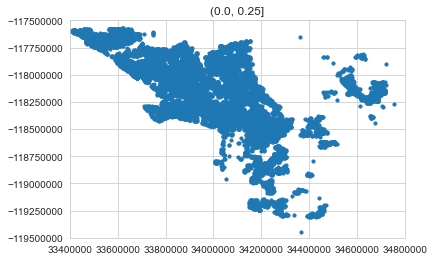

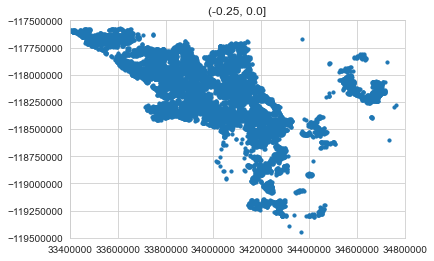

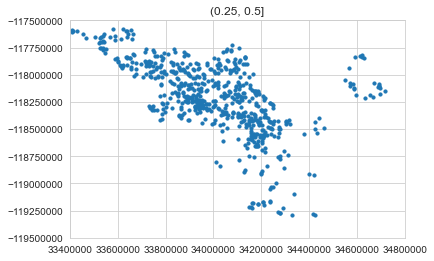

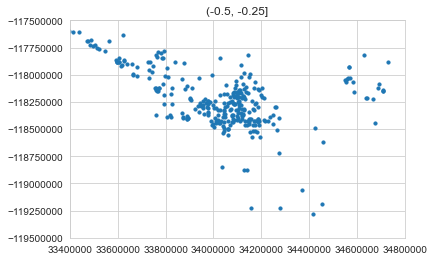

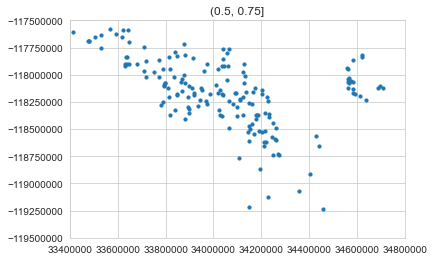

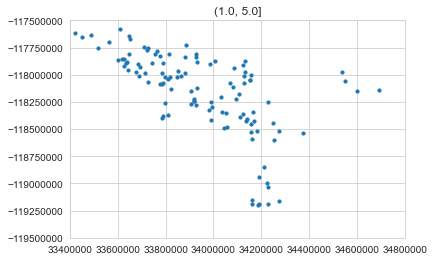

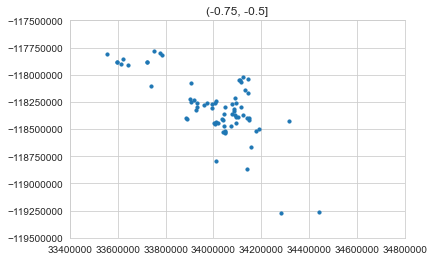

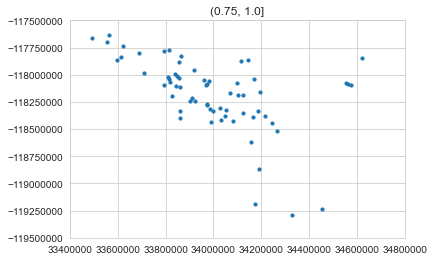

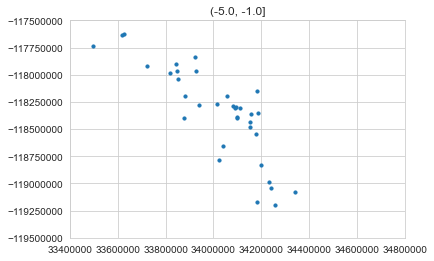

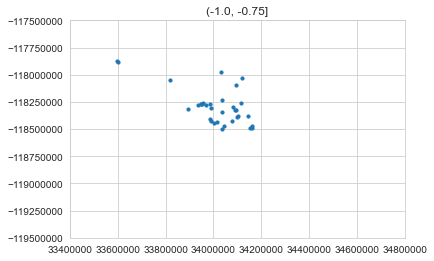

In [21]:
for x in train.logerror_bin.value_counts().index:
    plt.scatter(x='latitude', y='longitude', data=train[train.logerror_bin == x], s = 10)
    plt.title(x)
    plt.xlim(33400000,34800000)
    plt.ylim(-119500000,-117500000)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()


In [22]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[location])
    location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
    location_x_train['locationcluster',i] = kmeans.predict(scaled_x_train[location])
    clusters['locationclusters',i] = kmeans.predict(scaled_x_train[location])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/316957019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/316957019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['locationcluster',i] = kmeans.predict(scaled_x_train[location])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/316957019.py:6: SettingWithCopyWarni

In [23]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[structure])
    structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])
    structure_x_train['structurecluster',i] = kmeans.predict(scaled_x_train[structure])
    clusters['structureclusters',i] = kmeans.predict(scaled_x_train[structure])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3526294080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3526294080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structure_x_train['structurecluster',i] = kmeans.predict(scaled_x_train[structure])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3526294080.py:6: SettingWith

In [24]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[Foundation])
    foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
    foundation_x_train['foundationcluster',i] = kmeans.predict(scaled_x_train[Foundation])
    clusters['foundationclusters',i] = kmeans.predict(scaled_x_train[Foundation])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3494512040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3494512040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foundation_x_train['foundationcluster',i] = kmeans.predict(scaled_x_train[Foundation])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_31928/3494512040.py:6: Setti

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_x_train[structure])
structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_x_train[location])
location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_x_train[Foundation])
foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.wa

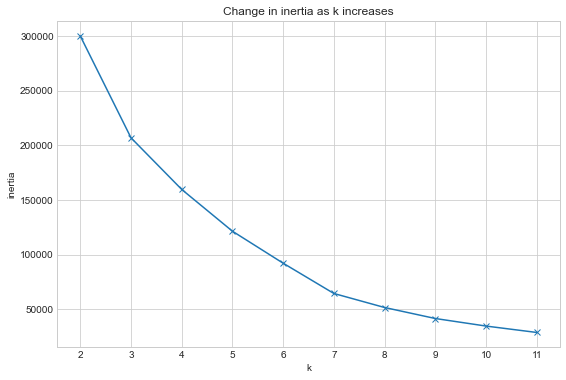

In [28]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(foundation_x_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [30]:
clusters

,"(foundationclusters, 2)","(foundationclusters, 3)","(foundationclusters, 4)","(foundationclusters, 5)","(foundationclusters, 6)","(foundationclusters, 7)","(foundationclusters, 8)","(foundationclusters, 9)"
0,0,1,2,0,1,0,4,0
1,0,1,1,1,2,2,0,3
2,0,1,2,0,1,0,4,0
3,1,2,0,4,0,5,7,1
4,1,2,0,4,0,5,7,1
...,...,...,...,...,...,...,...,...
28157,0,1,2,0,1,0,0,7
28158,0,2,1,1,2,2,2,3
28159,0,1,2,0,2,2,0,7
28160,0,1,2,0,1,2,0,7


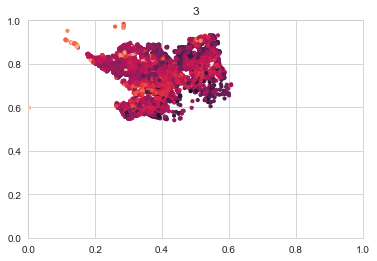

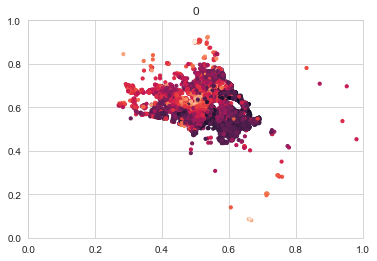

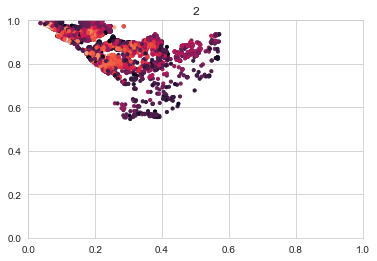

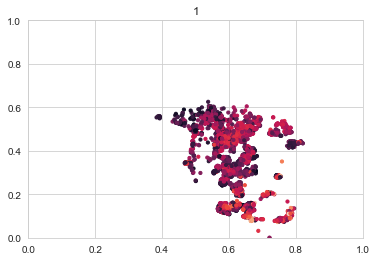

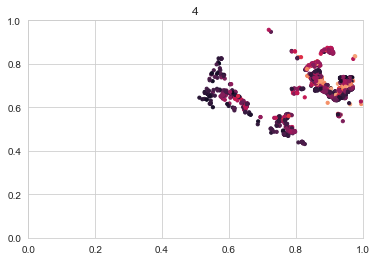

In [35]:
for x in location_x_train['bestLocation'].value_counts().index:
    plt.scatter(x=location_x_train.latitude[location_x_train.bestLocation == x], y=location_x_train.longitude[location_x_train.bestLocation == x], c = location_x_train.age[location_x_train.bestLocation == x], s = 10)
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


In [33]:
imp_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.060570,0.496183,0.433728,0.721678,0.049851,0.181818,0.0
30453,0.177337,0.305344,0.194141,0.940035,0.068203,0.272727,0.2
13337,0.078994,0.419847,0.535385,0.862331,0.073113,0.272727,0.1
7660,0.389585,0.022901,0.494856,0.521215,0.105400,0.454545,0.5
34175,0.359468,0.129771,0.457679,0.853861,0.102233,0.454545,0.4


In [ ]:
clusters.info()

In [ ]:
scaled_x_train[x_train]

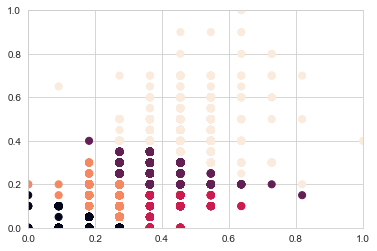

In [36]:
plt.scatter(x=structure_x_train.beds, y=structure_x_train.baths, c = structure_x_train.bestStructure , s = 50)

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

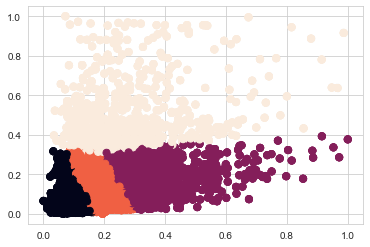

In [40]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

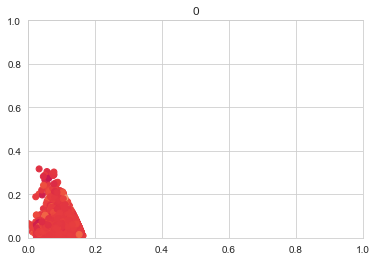

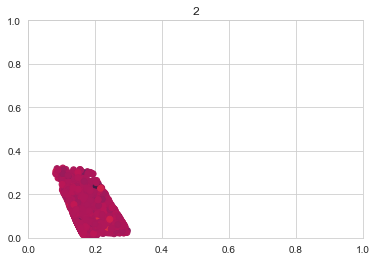

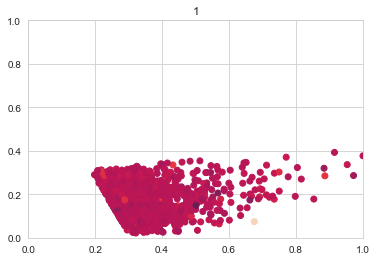

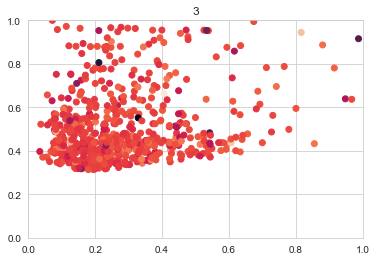

In [52]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(foundation_x_train.sqft[foundation_x_train.bestFoundation == x], foundation_x_train.lotsizesquarefeet[foundation_x_train.bestFoundation == x], c = train.logerror[foundation_x_train.bestFoundation == x])
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


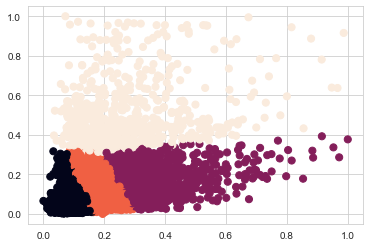

In [39]:

plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

In [ ]:
foundation_x_train.sqft

In [45]:
foundation_x_train


,sqft,lotsizesquarefeet,bestFoundation,"(foundationcluster, 2)","(foundationcluster, 3)","(foundationcluster, 4)","(foundationcluster, 5)","(foundationcluster, 6)","(foundationcluster, 7)","(foundationcluster, 8)","(foundationcluster, 9)"
13535,0.060570,0.049851,0,0,1,2,0,1,0,4,0
30453,0.177337,0.068203,2,0,1,1,1,2,2,0,3
13337,0.078994,0.073113,0,0,1,2,0,1,0,4,0
7660,0.389585,0.105400,1,1,2,0,4,0,5,7,1
34175,0.359468,0.102233,1,1,2,0,4,0,5,7,1
...,...,...,...,...,...,...,...,...,...,...,...
38066,0.122739,0.080504,0,0,1,2,0,1,0,0,7
48425,0.210314,0.054086,2,0,2,1,1,2,2,2,3
19647,0.152267,0.015468,0,0,1,2,0,2,2,0,7
21717,0.131404,0.060449,0,0,1,2,0,1,2,0,7


In [46]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,location,orange_county,ventura,losangeles,logerror_bin,latitude_bin,longitude_bin,squarefeet_bin,age_bin,lowerrors
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-117800000, 0]","(0, 3000]","(30, 60]","(0.0, 0.25]"
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,1,1,0,0,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(-0.25, 0.0]"
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,0,0,0,1,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(-0.25, 0.0]"
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.5, 0.75]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]",NaN
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(0.0, 0.25]"
